 # <p style="background-color:#C71585;font-family:Georgia;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Python Linear Programming to solve Optimization Problems</b></p>

## Problem:

The advertising alternatives for a company include television, newspaper and radio advertisements. The cost for each medium with their audience coverage is given below. 

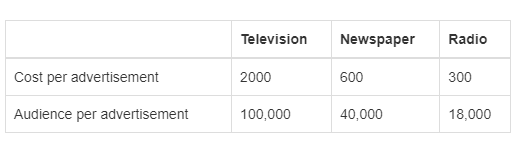

The local newspaper limits the number of advertisements from a single company to ten. 

Moreover, in order to balance the advertising among the three types of media, no more than half of the total number of advertisements should occur on the radio. And at least 10% should occur on television. 

The weekly advertising budget is Rs. 18,200. 

How many advertisements should be run in each of the three types of media to maximize the total audience?

[Source](https://upscfever.com/upsc-fever/en/gatecse/en-gatecse-chp13.html#:~:text=Example%3A%20A%20farmer%20has%20recently,and%20Barley%20can%20be%20sold.)

# <p style="background-color:#C71585;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Import Libraries and Define the Model</b></p>


In [1]:
#!pip install cplex
#!pip install docplex

In [1]:
from docplex.mp.model import Model

In [2]:
Model_LP= Model(name="Advertisements")

# <p style="background-color:#C71585;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Decision Variables</b></p>

**Step 1: Identify the decision variables**


Let X1, X2 and X3 represent the number of advertisements in television, newspaper, and radio, respectively.

In [3]:
X1= Model_LP.continuous_var(name="television")
X2= Model_LP.continuous_var(name="newspaper")
X3= Model_LP.continuous_var(name="radio")

In [4]:
#constants for constraints
cost_television= 2000
cost_newspaper= 600
cost_radio= 300


#constants for obj. function
audience_television= 100000
audience_newspaper= 40000
audience_radio= 18000

# <p style="background-color:#C71585;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Constraints</b></p>

**Step 2: Writing the constraints**


The constraints


- 2000X1 + 600X2 + 300X3 ≤ 18,200

- X2 ≤ 10

- X3 ≤ 0.5( X1 + X2 + X3 )

- X1 ≥ 0.1( X1 + X2 + X3 )

In [5]:
Model_LP.add_constraint(Model_LP.sum([cost_television*X1, cost_newspaper*X2, cost_radio*X3])<=18200)
Model_LP.add_constraint(X2<=10)
Model_LP.add_constraint(0.5*(Model_LP.sum([X1, X2, X3]))>=X3)
Model_LP.add_constraint(0.1*(Model_LP.sum([X1, X2, X3]))<=X1)

docplex.mp.LinearConstraint[](0.100television+0.100newspaper+0.100radio,LE,television)

# <p style="background-color:#C71585;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Objectives/Goals</b></p>


**Step 3: Write the objective function**


The objective function is 

Maximize Z = 100,000X1 + 40,000X2 + 18,000X3

In [6]:
Model_LP.maximize(audience_television*X1 + audience_newspaper*X2 + audience_radio*X3)

# <p style="background-color:#C71585;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Model Summary</b></p>


In [7]:
Model_LP.print_information()

Model: Advertisements
 - number of variables: 3
   - binary=0, integer=0, continuous=3
 - number of constraints: 4
   - linear=4
 - parameters: defaults
 - objective: maximize
 - problem type is: LP


# <p style="background-color:#C71585;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Solving...</b></p>
 

In [8]:
sol= Model_LP.solve()

In [9]:
sol.display()

solution for: Advertisements
objective: 1052000.000
television = 4.000
newspaper = 10.000
radio = 14.000


In [10]:
#other method
Model_LP.print_solution()

objective: 1052000.000
  television=4.000
  newspaper=10.000
  radio=14.000


In [11]:
Model_LP.parameters.lpmethod = 4
Model_LP.solve(log_output=True)

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
CPXPARAM_LPMethod                                4
Tried aggregator 1 time.
LP Presolve eliminated 3 rows and 2 columns.
Aggregator did 1 substitutions.
All rows and columns eliminated.
Presolve time = 0.01 sec. (0.00 ticks)
Parallel mode: deterministic, using up to 4 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting primal Simplex on 1 thread...

Dual simplex solved model.


Total time on 4 threads = 0.03 sec. (0.01 ticks)


docplex.mp.solution.SolveSolution(obj=1.052e+06,values={television:4,new..

<div style="color:white; font-size:125%; text-align:left; display:fill; border-radius:5px; background-color:#C71585; overflow:hidden">Thanks for reading. I hope you enjoy it and that it was helpful to you.<br>Please don't forget to follow me and give an upvote on</br>
👇👇👇
</div>

**<a href="https://www.kaggle.com/drindeng/" target="_blank" rel="noopener noreferrer">[Kaggle]</a> | 
<a href="https://github.com/drindeng" target="_blank" rel="noopener noreferrer">[GitHub]</a> |
<a href="https://www.linkedin.com/in/turgay-turker/" target="_blank" rel="noopener noreferrer">[Linkedin]</a>**